# Assignment 3: LDA Topic Modeling

## Note
Installing Tomotopy locally can return an error, if that's the case run this notebook on Google Colab

## Research Background

LDA is a popular topic modeling algorithm widely used in the fields of Digital Humanities and Social Sciences. In the field of political communication, topic modeling is often applied for analyzing politicians Twitter/X posts, identitying thematic patterns or topics revolving around their posts.

For this assignment, students will work with tweets from two USA politicians, Donald Trump and Bernie Sanders, who are often regarded as right-wing populist and left-wing populist respectively. Right-wing populism often emphasizes nationalism, anti-immigration policies, and a critique of global elites from a culturally conservative perspective, focusing on preserving traditional values and social hierarchies. Left-wing populism prioritizes economic inequality, advocating for the redistribution of wealth, expansion of social services, and empowerment of the working class against the capitalist elite. While both forms of populism appeal to the "common people" against perceived elites and established structures, they diverge significantly in their identification of the elites, proposed solutions, and core ideologies. For a more detailed explanation, you can read the chapter by Macaulay (2019) "Bernie and The Donald: A comparison of left-and right-wing populist discourse" (full reference below).

**Research Questions**
1. What topics are revolving around Donald Trump and Bernie Sanders' posts separately?
2. What are the topic differences between Trump (right-wing popoulist) and Sanders (left-wing populist)?

**Aim:**
1. The first aim of the assignment is to conduct LDA topic modeling. Identify thematic patterns or politics revolving around Trump or Sanders's posts.
2. The second aim is to critically evaluate the results of topic modeling. Try different numbers of topics to see with which settings the topics are more coherent. Critically reflect on the results of LDA topic modeling, discussing them in relation to existing theories about populism.

**Data**
Two datasets are prepared for this assginment. Tweets from Trump and tweets from Sanders. Students are asked to work on these two datasets.

**Methods**
1. Word segamentation
2. Removing stopwords
3. LDA topic modeling
4. Topic evaulation (coherence and human evaluation)
5. Visualization of results.

**References**
1. Macaulay, M. (2019). Bernie and the Donald: A comparison of Left-and Right-wing populist discourse. *Populist discourse: International perspectives*, 165-195.

<span style = "color:green"> The following two references in green are documented by me, because I have cited them in Q6's interpretation.</span>

2. <span style="color:green">Kapadia, S. (2019). Evaluate Topic Models: Latent Dirichlet Allocation (LDA). *Towards Data Science*. https://towardsdatascience.com/evaluatetopic-model-in-python-latent-dirichlet-allocation-lda-7d57484bb5d0</span>
3.  <span style="color:green">Mimno,D., Wallach, E., Leenders, T., & McCallum, A. (2011). *Optimizing Semantic Coherence in Topic Models*. Association for Computational Linguistics. </span>


## Setup

### Q1. Install necessary libraries, including `tomotopy` and `little_mallet_wrapper`, and import them

In [3]:
# Q1 (code)
# Install necessary libraries, tomotopy is for topic modeling
!pip install tomotopy

Defaulting to user installation because normal site-packages is not writeable
Looking in indexes: http://pypi.tuna.tsinghua.edu.cn/simple/


In [4]:
# Install necessary libraries, little_mallet_wrapper is a Python wrapper for MALLET
!pip install little_mallet_wrapper

Defaulting to user installation because normal site-packages is not writeable
Looking in indexes: http://pypi.tuna.tsinghua.edu.cn/simple/


In [5]:
import tomotopy as tp #for topic modeling
import little_mallet_wrapper # for topic modeling
import seaborn as sns #for visualization
import matplotlib.pyplot as plt #for plot drawing
import glob #for managing path
import pandas as pd #for data manipulation
# For text processing
import re #for regular expressions
from nltk.corpus import stopwords #for stopwords
from nltk.tokenize import word_tokenize #for tokenization
import string #for string manipulation
from IPython.display import Markdown, display #display markdown

C:\anaconda3\lib\site-packages\pandas\core\computation\expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.8.3' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
C:\anaconda3\lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


## Data preprocessing

### Q2. Load the two datasets and concatenate them

The goal is to run topic modelling on the combined dataset of Sanders and Trump's tweets

In [6]:
# Q2 (code)
# Read files we need to analyze
df_s = pd.read_csv('C:/users/idaid/Desktop/sanders_tweets.csv')
df_t = pd.read_csv('C:/users/idaid/Desktop/trump_tweets.csv')
# Combine the two files together
df = pd.concat([df_s, df_t], ignore_index=True)
df.head() #show some information

,Username,TweetId,Title,Content
0,SenSanders,1351670845639421952,SenSanders_1351670845639421952,Wealth increase in past 10 months:\n⬆️$173 bil...
1,SenSanders,1351259762722279424,SenSanders_1351259762722279424,Amidst massive income and wealth inequality te...
2,SenSanders,1351242822293319680,SenSanders_1351242822293319680,"“We now have the resources, we now have the sk..."
3,SenSanders,1350885541911400448,SenSanders_1350885541911400448,"After surviving an attempt on his life, Russia..."
4,SenSanders,1349880150041780224,SenSanders_1349880150041780224,President-Elect Biden's COVID rescue plan will...


In [7]:
# Output the combined dataset as a csv
df.to_csv('C:/users/idaid/Desktop/sanders_trump_tweets.csv')

### Q3. Clean the data

Transform all tweets to lowercase, remove stopwords, punctuation, and numbers. Add the processed text to a list called `training_data`.
Create a list with the content of the tweets (`original_texts`) and a list that allows you to identify both the author of the tweet and its ID (`titles`).


<span style = "color:green"> Here I tried two ways for cleaning the data. Firstly, I used the codes from lab class material: topic_modeling_tomotopy.ipynb, but during the checking process, I found they are not well cleaned, for example, in tweet 3, there is "x vksfnvx", and in tweet 5, there is a letter "i". Then, I referred to machinelearningmastery.com for better data cleanning.</span>

### Option 1

In [8]:
# Q3 (code)

# Make the required lists
training_data = []
original_texts = []
titles = []

# Iterate through each row from the dataframe， process the texts, and then append them to the lists
for index, row in df.iterrows():
    content_text = row['Content']
    processed_text = little_mallet_wrapper.process_string(content_text, numbers='remove')
    # Tip: add the following line to remove URLS and user mentions
    processed_text = re.sub(r"http\S+|www\S+|https\S+|\/\/t|co\/|\@\w+|realdonaldtrump", '', processed_text, flags=re.MULTILINE)
    training_data.append(processed_text)
    original_texts.append(content_text)
    titles.append(row['Title'])

In [9]:
# Display information, the length of training_data, original_texts, titles
len(training_data), len(original_texts), len(titles)

(30371, 30371, 30371)

In [10]:
# Check some cleaned texts to see if correctly cleaned
for i, text in enumerate(training_data[:5]):
    print(f"tweet {i + 1}: {text}")

tweet 1: wealth increase past months billion elon musk billion jeff bezos billion walton family billion bill gates billion mark zuckerberg year increase minimum wage must tax rich raise minimum wage least
tweet 2: amidst massive income wealth inequality tens millions americans working starvation wages need raise minimum wage living wage least hour excuses need act
tweet 3: resources skills techniques get rid poverty question whether nation martin luther king   x vksfnvx
tweet 4: surviving attempt life russian activist alexei navalny detained bravely returning russia today call release united states must stand fighting corruption working democracy around world
tweet 5: president elect biden covid rescue plan begin provide people much needed support direct payments minimum wage look forward working colleagues congress urgently provide bold relief working families   i


### Option 2

In [11]:
# Q3 (code)

training_data = []
for processed_text in df['Content']:
    # Tip: add the following line to remove URLS and user mentions
    processed_text = re.sub(r"http\S+|www\S+|https\S+|\/\/t|co\/|\@\w+|realdonaldtrump", '', processed_text, flags=re.MULTILINE)
    # Tokenize text
    tokens = word_tokenize(processed_text)
    # Remove all tokens that are not alphabetic
    tokens = [word.lower() for word in tokens if word.isalpha()]
    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if not word in stop_words]
    # Rejoin tokens into a string
    processed_text = ' '.join(tokens)
    training_data.append(processed_text)

# Per A3's instructions, students can use Internet for help. In the text cleaning, I refer to this webpage for help, please see the link below:
# https://machinelearningmastery.com/clean-text-machine-learning-python/ 
# Comment: this webpage is useful.

original_texts = df.Content.tolist()
titles = df.Title.tolist()

# Display information, such as the length of training_data, original_texts, titles
len(training_data), len(original_texts), len(titles)

(30371, 30371, 30371)

In [12]:
# Check some cleaned texts to see if correctly cleaned
for i, text in enumerate(training_data[:5]):
    print(f"tweet {i + 1}: {text}")

tweet 1: wealth increase past months billion elon musk billion jeff bezos billion walton family billion bill gates billion mark zuckerberg increase minimum wage must tax rich amp raise minimum wage least
tweet 2: amidst massive income wealth inequality tens millions americans working starvation wages need raise minimum wage living wage least hour excuses need act
tweet 3: resources skills techniques get rid poverty question whether nation martin luther king jr
tweet 4: surviving attempt life russian activist alexei navalny detained bravely returning russia today call release united states must stand fighting corruption working democracy around world
tweet 5: biden covid rescue plan begin provide people support direct payments minimum wage look forward working colleagues congress urgently provide bold relief working families


<span style = "color:green">Then, we can see that the meaningless letters "x vksfnvx" in tweet 3 and "i" in tweet 5 are gone by trying the second method.</span>

## LDA topic modelling

### Q4. Train a an LDA topic model with `tomotopy`

In [10]:
# Q4 (code)
# Number of topics to return
num_topics = 15
# Number of topic words to print out
num_topic_words = 10

# Intialize the model
model = tp.LDAModel(k=num_topics)

# Add each document to the model, after splitting it up into words
for text in training_data:
    model.add_doc(text.strip().split())

print("Topic Model Training...\n\n")
# Iterate over the data 10 times
iterations = 10
for i in range(0, 100, iterations):
    model.train(iterations)
    print(f'Iteration: {i}\tLog-likelihood: {model.ll_per_word}')

Topic Model Training...


Iteration: 0	Log-likelihood: -9.198772215584281
Iteration: 10	Log-likelihood: -8.79530917542364
Iteration: 20	Log-likelihood: -8.607229728251081
Iteration: 30	Log-likelihood: -8.511626247314013
Iteration: 40	Log-likelihood: -8.452330575092637
Iteration: 50	Log-likelihood: -8.4043622004441
Iteration: 60	Log-likelihood: -8.375584163535745
Iteration: 70	Log-likelihood: -8.348415914978073
Iteration: 80	Log-likelihood: -8.330352136416721
Iteration: 90	Log-likelihood: -8.316818738059123


### Q5. Print out the top words for each topic and manually evaluate their coherence


In [11]:
# Q5a (code)
# Print out the top 10 words for 15 topics
print("\nTopic Model Results:\n\n")

topics = []
topic_individual_words = []
for topic_number in range(0, num_topics):
    topic_words = ' '.join(word for word, prob in model.get_topic_words(topic_id=topic_number, top_n=num_topic_words))
    topics.append(topic_words)
    topic_individual_words.append(topic_words.split())
    print(f"✨Topic {topic_number}✨\n\n{topic_words}\n")


Topic Model Results:


✨Topic 0✨

health care tax people workers americans million must need pay

✨Topic 1✨

great china jobs trade economy years country big amp ever

✨Topic 2✨

iran united states money trump us would military war president

✨Topic 3✨

rt amp new president great today america thank trump coronavirus

✨Topic 4✨

people american country america women today nation day rt us

✨Topic 5✨

news fake media amp people never even would like bad

✨Topic 6✨

rt trump president schiff call via adam thank watch election

✨Topic 7✨

must border wall change drug climate energy need people system

✨Topic 8✨

great thank rt president north today meeting korea forward join

✨Topic 9✨

great vote state thank total endorsement amp military job strong

✨Topic 10✨

fbi collusion witch russia mueller hunt amp hillary trump campaign

✨Topic 11✨

rt president court trump house supreme white judge justice happy

✨Topic 12✨

democrats want republicans people vote amp get republican senate count

## Q5b (words)
### Describe what each topic is about. What ideas, values, or situations do these keywords refer to?

Topic 0 has keywords such as health, care, workers, tax, must. From these keywords, it is likely to infer that they are about health care and workers' rights. Additionally, Topic 8 has the features of left-wing populism, discussing on working class, social welfare and services.

Topic 1 has keywords such as china, jobs, trade, economy. From these keywords, it is likey to infer that they are bout foreign trade policy with China.

Topic 2 has keywords such as iran, united, states, military. From these keywords, it is likely to infer that they are about military issues with Iran.

Topic 3 has keywords such as president, great, today, thank, coronavirus. From these keywords, it is likely to infer that they are about expressing a greeting, the situation is likely to be a compaign or open speech.

Topic 4 has keywords such as America, women, day, nation. From these keywords, it is likely to infer that Topic 4 is about celebrating women's day in the United States.

Topic 5 has keywords such as news, fake, media, bad. From these keywords, it is likely to infer that they are about fake news. Additionally, keyword "bad" shows the attitude is negative.

Topic 6 has keywords such as trump, president, schiff, adam, thank, election. From these keywords, it is likely to infer that they are about a political figure Adam Schiff, discussing his role in an election.

Topic 7 has keywords such as border, wall, drug, change, climate, energy. From these keywords, it is likely to infer that they are about immigrant issues, climate change and energy issues.

Topic 8 has keywords such as great, thank, today, north, korea, join. From these keywords, it is likely to infer that they are about North Korea. The situation is likely to be a campaign and talking about foreign diplomacy issues with North Korea.

Topic 9 has keywords such as great, endorsement, vote, military, job. From these keywords, it is likely to infer that they are about making policies of military and job issues. 

Topic 10 has keywords such as trump, collusion, witch, hunt, russia, campaign. From these keywords, it is likely to infer that they are about collusion issues, witch hunt in politics and issues related with Russia. These issues are related to Trump based on my knowledge. To be specific, I assume that they are about collusion issues of trump, and these issues are seemed as witch-hunt, which means Trump is denigrated and persecuted by his political opponents.

Topic 11 has keywords such as president, trump, house, supreme, white, judge, justice. From these keywords, it is likely to infer that they are about Trump is involved in a case and the case is about justice.

Topic 12 has keywords such as democrats, republicans, vote, senate. From these keywords, it is likely to infer that they are about two parties are engaged in voting in the senate. 

Topic 13 has keywords such as democrats, president, impeachment, biden, trump, pelosi. From these keywords, it is likely to infer that they are about impeachment of a president. Based on my knowledge of the United States political news, topic 13 is likely about the impeachment of Trump and the conflict between democrats and republicans.

Topic 14 has keywords such as law, puerto, police, enforcement, rico, government. From these keywords, it is likely to infer that they are about Puerto Rico law issues.

**In conclusion, most of 15 topics are very likely about President Trump, from Trump's attitude on "fake news" and events such as collusion investigation and impeachment, but some topics are related to left wing populism, focusing on the working class and social services such as health care, these tweets could be posted by Sanders.**

## Topic coherence

Use `tomotopy`'s [`.coherence()`](https://bab2min.github.io/tomotopy/v0.10.0/en/coherence.html) function to automatically calculate the topic coherence.

The coherence value can vary from `0` (no coherence) to `1` (maximum coherence). Interpret the results and, if needed, retrain the model using a different number of topics.

<span style="color:green">Here I train the model with 10 topics, 15 topics, 20 topics, 25 topics, and 50 topics respectively for quantitative data.</span>

### Train the model with 10 topics

In [12]:
# Number of topics to return
num_topics = 10
# Number of topic words to print out
num_topic_words = 10

# Intialize the model
model = tp.LDAModel(k=num_topics)

# Add each document to the model, after splitting it up into words
for text in training_data:
    model.add_doc(text.strip().split())

print("Topic Model Training(initial topic number=10)...\n\n")
# Iterate over the data 10 times
iterations = 10
for i in range(0, 100, iterations):
    model.train(iterations)
    print(f'Iteration: {i}\tLog-likelihood: {model.ll_per_word}')

# There are different metrics for coherence, we choose `c_v`    
coh = tp.coherence.Coherence(model, coherence='c_v')
average_coherence = coh.get_score()
coherence_per_topic = [coh.get_score(topic_id=k) for k in range(model.k)]
print('==== Coherence : {} ===='.format('c_v'))
print('Average:', average_coherence, '\nPer Topic:', coherence_per_topic)
print()

Topic Model Training(initial topic number=10)...


Iteration: 0	Log-likelihood: -9.074746760019137
Iteration: 10	Log-likelihood: -8.696699408580072
Iteration: 20	Log-likelihood: -8.524848526141033
Iteration: 30	Log-likelihood: -8.448715157523269
Iteration: 40	Log-likelihood: -8.396439205756039
Iteration: 50	Log-likelihood: -8.364229582435538
Iteration: 60	Log-likelihood: -8.334932266742694
Iteration: 70	Log-likelihood: -8.31973068633311
Iteration: 80	Log-likelihood: -8.303847948261986
Iteration: 90	Log-likelihood: -8.293656307339381
==== Coherence : c_v ====
Average: 0.5364017318747938 
Per Topic: [0.5390602588653565, 0.5011336863040924, 0.634592966735363, 0.6215010911226273, 0.493154314160347, 0.4817174091935158, 0.608754326403141, 0.5839016407728195, 0.42014077212661505, 0.4800608530640602]



### Train the model with 15 topics

In [13]:
# Number of topics to return
num_topics = 15
# Number of topic words to print out
num_topic_words = 10

# Intialize the model
model = tp.LDAModel(k=num_topics)

# Add each document to the model, after splitting it up into words
for text in training_data:
    model.add_doc(text.strip().split())

print("Topic Model Training(initial topic number=15)...\n\n")
# Iterate over the data 10 times
iterations = 10
for i in range(0, 100, iterations):
    model.train(iterations)
    print(f'Iteration: {i}\tLog-likelihood: {model.ll_per_word}')
    
coh = tp.coherence.Coherence(model, coherence='c_v')
average_coherence = coh.get_score()
coherence_per_topic = [coh.get_score(topic_id=k) for k in range(model.k)]
print('==== Coherence : {} ===='.format('c_v'))
print('Average:', average_coherence, '\nPer Topic:', coherence_per_topic)
print()

Topic Model Training(initial topic number=15)...


Iteration: 0	Log-likelihood: -9.21193927296007
Iteration: 10	Log-likelihood: -8.77284377912437
Iteration: 20	Log-likelihood: -8.586153015791702
Iteration: 30	Log-likelihood: -8.49952793209614
Iteration: 40	Log-likelihood: -8.448231119353586
Iteration: 50	Log-likelihood: -8.409159728121052
Iteration: 60	Log-likelihood: -8.382082413757324
Iteration: 70	Log-likelihood: -8.360092222031868
Iteration: 80	Log-likelihood: -8.341685495314811
Iteration: 90	Log-likelihood: -8.325583887113227
==== Coherence : c_v ====
Average: 0.5314726265147328 
Per Topic: [0.4652356952428818, 0.44197415858507155, 0.5052114933729172, 0.6909360975027085, 0.5479962170124054, 0.4475756615400314, 0.48105407431721686, 0.710184982419014, 0.580575916171074, 0.6493768721818924, 0.45057020150125027, 0.4703364908695221, 0.3703978994861245, 0.6048346400260926, 0.5558289974927902]



### Train the model with 20 topics

In [14]:
# Number of topics to return
num_topics = 20
# Number of topic words to print out
num_topic_words = 10

# Intialize the model
model = tp.LDAModel(k=num_topics)

# Add each document to the model, after splitting it up into words
for text in training_data:
    model.add_doc(text.strip().split())

print("Topic Model Training(new topic number=20)...\n\n")
# Iterate over the data 10 times
iterations = 10
for i in range(0, 100, iterations):
    model.train(iterations)
    print(f'Iteration: {i}\tLog-likelihood: {model.ll_per_word}')
    
coh = tp.coherence.Coherence(model, coherence='c_v')
average_coherence = coh.get_score()
coherence_per_topic = [coh.get_score(topic_id=k) for k in range(model.k)]

print('==== Coherence : {} ===='.format('c_v'))
print('Average:', average_coherence, '\nPer Topic:', coherence_per_topic)
print()

Topic Model Training(new topic number=20)...


Iteration: 0	Log-likelihood: -9.30028230811356
Iteration: 10	Log-likelihood: -8.85594115195917
Iteration: 20	Log-likelihood: -8.66901867666851
Iteration: 30	Log-likelihood: -8.564216076769066
Iteration: 40	Log-likelihood: -8.49628474469727
Iteration: 50	Log-likelihood: -8.445984807436181
Iteration: 60	Log-likelihood: -8.411258392782601
Iteration: 70	Log-likelihood: -8.384668359963854
Iteration: 80	Log-likelihood: -8.36178279406719
Iteration: 90	Log-likelihood: -8.34151586140857
==== Coherence : c_v ====
Average: 0.5564051965391263 
Per Topic: [0.5939921200275421, 0.47915667816996577, 0.4729532808065414, 0.6432443648576737, 0.6095639348030091, 0.7260333895683289, 0.47265864312648775, 0.45015729665756227, 0.3934868574142456, 0.5680692926049232, 0.5262292265892029, 0.638131498824805, 0.6203559197485446, 0.40767171084880827, 0.7075400054454803, 0.6511183112859726, 0.5001178115606308, 0.5640303879976273, 0.5260368376970291, 0.577556362748146]



### Train the model with 25 topics

In [15]:
# Number of topics to return
num_topics = 25
# Number of topic words to print out
num_topic_words = 10

# Intialize the model
model = tp.LDAModel(k=num_topics)

# Add each document to the model, after splitting it up into words
for text in training_data:
    model.add_doc(text.strip().split())

print("Topic Model Training(new topic number=25)...\n\n")
# Iterate over the data 10 times
iterations = 10
for i in range(0, 100, iterations):
    model.train(iterations)
    print(f'Iteration: {i}\tLog-likelihood: {model.ll_per_word}')
    
coh = tp.coherence.Coherence(model, coherence='c_v')
average_coherence = coh.get_score()
coherence_per_topic = [coh.get_score(topic_id=k) for k in range(model.k)]

print('==== Coherence : {} ===='.format('c_v'))
print('Average:', average_coherence, '\nPer Topic:', coherence_per_topic)
print()

Topic Model Training(new topic number=25)...


Iteration: 0	Log-likelihood: -9.368569776517088
Iteration: 10	Log-likelihood: -8.881918695707736
Iteration: 20	Log-likelihood: -8.6754678650148
Iteration: 30	Log-likelihood: -8.562505083879657
Iteration: 40	Log-likelihood: -8.479757708621825
Iteration: 50	Log-likelihood: -8.428969792126654
Iteration: 60	Log-likelihood: -8.38733112065813
Iteration: 70	Log-likelihood: -8.361134744398193
Iteration: 80	Log-likelihood: -8.337670192256658
Iteration: 90	Log-likelihood: -8.317529653545241
==== Coherence : c_v ====
Average: 0.5770513551682234 
Per Topic: [0.6273856595158577, 0.49457788467407227, 0.4773407965898514, 0.5080103367567063, 0.6743496537208558, 0.5772363528609276, 0.5312645480036735, 0.5561649978160859, 0.46174721866846086, 0.7426239073276519, 0.6292018666863441, 0.7481320887804032, 0.6225684598088265, 0.5389284193515778, 0.5373545438051224, 0.6341501921415329, 0.64864262342453, 0.6024923659861088, 0.5254879325628281, 0.5647064927965403, 

### Train the model with 50 topics

In [16]:
# Number of topics to return
num_topics = 50
# Number of topic words to print out
num_topic_words = 10

# Intialize the model
model = tp.LDAModel(k=num_topics)

# Add each document to the model, after splitting it up into words
for text in training_data:
    model.add_doc(text.strip().split())

print("Topic Model Training(new topic number=50)...\n\n")
# Iterate over the data 10 times
iterations = 10
for i in range(0, 100, iterations):
    model.train(iterations)
    print(f'Iteration: {i}\tLog-likelihood: {model.ll_per_word}')
    
coh = tp.coherence.Coherence(model, coherence='c_v')
average_coherence = coh.get_score()
coherence_per_topic = [coh.get_score(topic_id=k) for k in range(model.k)]

print('==== Coherence : {} ===='.format('c_v'))
print('Average:', average_coherence, '\nPer Topic:', coherence_per_topic)
print()

Topic Model Training(new topic number=50)...


Iteration: 0	Log-likelihood: -9.585832949718597
Iteration: 10	Log-likelihood: -9.026343328339493
Iteration: 20	Log-likelihood: -8.805705161354165
Iteration: 30	Log-likelihood: -8.680011162465549
Iteration: 40	Log-likelihood: -8.595214133153698
Iteration: 50	Log-likelihood: -8.529908843178465
Iteration: 60	Log-likelihood: -8.482043575709417
Iteration: 70	Log-likelihood: -8.442133590867117
Iteration: 80	Log-likelihood: -8.414003546241434
Iteration: 90	Log-likelihood: -8.387148382517232
==== Coherence : c_v ====
Average: 0.6040211923941967 
Per Topic: [0.5387034147977829, 0.6192047476768494, 0.5370894521474838, 0.673872435092926, 0.5738711029291153, 0.522397743165493, 0.561735737323761, 0.6690797612071038, 0.6446382135152817, 0.5708368092775344, 0.5972190767526626, 0.5818439245223999, 0.52877506762743, 0.4487742635421455, 0.46731949001550677, 0.6976786941289902, 0.7155095309019088, 0.7099532306194305, 0.5381711542606353, 0.7111621350049973, 0

### Q6. Interpret topic coherence

Report the following:
- number of topics you initially used to train the model and the coherence score you got
- changes made to the number of topics and new coherence scores obtained

## Q6 (words)
Report:
1. I initally used 10 topics to train the model, the coherence score included average coherence and per-topic coherence. Average coherence score was **0.5364** and per-topic coherence score ranged from **0.4201** to **0.6346**.

2. Then the number of topics was adjusted after adding 5 additional articles. When it comes to 15 topics, average coherence score slightly decreased to **0.5315** and per-topic coherence score ranged from **0.3704** to **0.7102**. When it comes to 20 topics, average coherence score increased to **0.5564** and per-topic coherence score ranged from **0.4077** to **0.7075**. When it comes to 25 topics, average coherence score increased to **0.5771** and per-topic coherence score ranged from **0.4362** to **0.7481**. When the topics are doubled to 50, average coherence score increased to **0.6040**, and per-topic coherence score ranged from **0.4488** to **0.7720**.

Interpretation:

Topic coherence in topic modeling compares the semantic similarity of highly repeated words in a topic to determine the quality of the data (Kapadia, 2019). According to Mimno et al. (2011), coherence score is a scale from 0 to 1, a score of 1 means a good coherence (high similarity), and a score of 0 means a bad coherence (low similarity).

In my analysis, from 10 topics to 25 topics, there is a steady increase in the average coherence score. All of the coherence scores are above 0.5, they show a **medium** similarity. Then, I doubled the topics to 50 to see if there is any change. The average coherence score of 50 topics turns to be **0.6040**, this score marks a big difference, indicating the possibility of the coherence score growth could be achieved by increasing more topics.

### X1. Optional question 1
(This question is not compulsory, it only allows you to get an extra point.)

Create a function to plot the average coherence for models with different number of topics.

In [ ]:
# X1 (code)
# Tip: y = average topic coherence; x = number of topics in the model

### Q7. Topic distributions
Calculate the topic distributions for all tweets and get the top documents for some topics (between 2 and 5) that you think could be more representative of Sanders or Trump.

In [30]:
# Q7a (code)
def make_md(string):
    display(Markdown(str(string)))

def get_top_docs(docs, topic_distributions, topic_index, n=5):

    sorted_data = sorted([(_distribution[topic_index], _document)
                          for _distribution, _document
                          in zip(topic_distributions, docs)], reverse=True)

    topic_words = topics[topic_index]

    make_md(f"### ✨Topic {topic_index}✨\n\n{topic_words}\n\n")
    print("---")

    for probability, doc in sorted_data[:n]:
        # Make topic words bolded
        for word in topic_words.split():
            if word in doc.lower():
                doc = re.sub(f"\\b{word}\\b", f"**{word}**", doc, re.IGNORECASE)

        make_md(f'✨  \n**Topic Probability**: {probability}  \n**Document**: {doc}  \n\n')

    return

#Trained topic model with 15 topics
# Number of topics to return
num_topics = 15
# Number of topic words to print out
num_topic_words = 10

# Intialize the model
model = tp.LDAModel(k=num_topics)

# Add each document to the model, after splitting it up into words
for text in training_data:
    model.add_doc(text.strip().split())

print("Topic Model Training...\n\n")
# Iterate over the data 10 times
iterations = 10
for i in range(0, 100, iterations):
    model.train(iterations)
    print(f'Iteration: {i}\tLog-likelihood: {model.ll_per_word}')

# Calculate distributions and display chosen topics
topic_distributions = [list(doc.get_topic_dist()) for doc in model.docs]

get_top_docs(titles, topic_distributions, topic_index=1, n=5)
get_top_docs(titles, topic_distributions, topic_index=2, n=5)
get_top_docs(titles, topic_distributions, topic_index=5, n=5)
get_top_docs(titles, topic_distributions, topic_index=8, n=5)
get_top_docs(titles, topic_distributions, topic_index=10, n=5)

Topic Model Training...


Iteration: 0	Log-likelihood: -9.185394152682264
Iteration: 10	Log-likelihood: -8.791678624210263
Iteration: 20	Log-likelihood: -8.6130347643971
Iteration: 30	Log-likelihood: -8.508526166335926
Iteration: 40	Log-likelihood: -8.44165831858841
Iteration: 50	Log-likelihood: -8.394847346240883
Iteration: 60	Log-likelihood: -8.361603543884959
Iteration: 70	Log-likelihood: -8.334238414184126
Iteration: 80	Log-likelihood: -8.314134164314451
Iteration: 90	Log-likelihood: -8.296867548928965


### ✨Topic 1✨

great china jobs trade economy years country big amp ever



---


✨  
**Topic Probability**: 0.8995807766914368  
**Document**: SenSanders_994242822625775616  



✨  
**Topic Probability**: 0.8777419924736023  
**Document**: SenSanders_918239286037639168  



✨  
**Topic Probability**: 0.8777419924736023  
**Document**: SenSanders_850799608527826944  



✨  
**Topic Probability**: 0.8681866526603699  
**Document**: @realDonaldTrump_982268230306709509  



✨  
**Topic Probability**: 0.8570109605789185  
**Document**: @realDonaldTrump_1261368451555360774  



### ✨Topic 2✨

iran united states money trump us would military war president



---


✨  
**Topic Probability**: 0.9352744817733765  
**Document**: @realDonaldTrump_1219865116239388672  



✨  
**Topic Probability**: 0.926755964756012  
**Document**: @realDonaldTrump_1293729081947815936  



✨  
**Topic Probability**: 0.926755964756012  
**Document**: @realDonaldTrump_1212163955784921089  



✨  
**Topic Probability**: 0.9233953356742859  
**Document**: @realDonaldTrump_1221438768256823296  



✨  
**Topic Probability**: 0.9197114706039429  
**Document**: @realDonaldTrump_938422792080457731  



### ✨Topic 5✨

news fake media amp people never even would like bad



---


✨  
**Topic Probability**: 0.9408614635467529  
**Document**: @realDonaldTrump_1205104256312848385  



✨  
**Topic Probability**: 0.9278894662857056  
**Document**: @realDonaldTrump_1213078681750573056  



✨  
**Topic Probability**: 0.9278894662857056  
**Document**: @realDonaldTrump_1203771565676138496  



✨  
**Topic Probability**: 0.9245808124542236  
**Document**: @realDonaldTrump_1222010643219386368  



✨  
**Topic Probability**: 0.9245808124542236  
**Document**: @realDonaldTrump_1181746918474440705  



### ✨Topic 8✨

great thank rt president north today meeting korea forward join



---


✨  
**Topic Probability**: 0.9664854407310486  
**Document**: @realDonaldTrump_1208897504827326465  



✨  
**Topic Probability**: 0.9664854407310486  
**Document**: @realDonaldTrump_1208494102062477312  



✨  
**Topic Probability**: 0.9636805653572083  
**Document**: SenSanders_1157302848616652800  



✨  
**Topic Probability**: 0.9629044532775879  
**Document**: SenSanders_1152580921368780800  



✨  
**Topic Probability**: 0.9612482190132141  
**Document**: SenSanders_1318297194429091840  



### ✨Topic 10✨

fbi collusion witch russia mueller hunt amp hillary trump campaign



---


✨  
**Topic Probability**: 0.9356464743614197  
**Document**: @realDonaldTrump_939521466634326016  



✨  
**Topic Probability**: 0.9356464743614197  
**Document**: @realDonaldTrump_1165395410787196929  



✨  
**Topic Probability**: 0.9329419136047363  
**Document**: @realDonaldTrump_1258020228006584320  



✨  
**Topic Probability**: 0.9300000667572021  
**Document**: @realDonaldTrump_1013037916216614912  



✨  
**Topic Probability**: 0.9151022434234619  
**Document**: @realDonaldTrump_1119915768429387778  



Interpret the results above. Are there topics that have top tweets only by one politician? Why do you think these topics are more representative of one of the two politicians' views?

### Q7b (words)
The above results show that top tweets of Topic 2, Topic 5 and Topic 10 are only by Trump, Topic 1 and Topic 8 have mixed top tweets from the two politicians.

Topic 1 is about trades with China, I pick it because I think it is representative of Trump's views. However, the results show that Sanders also tweets about trades with China. So the trading issues with China is not about whether a right-wing populism or left-wing populism matter, these issues would be discussed by both wings.

Topic 2 is about Iran and military. I pick it because I think a right-wing figure Trump would be more interested in this issue. Additionally, right-wing populism focused more on nationalism, so this topic is related to Iran, the country which portrays as US's enemy, correlates to the right-wing populism idea. The results show that topic tweets of Topic 2 are by Trump.

Topic 5 is about fake news and media. I pick it because Trump criticizes news to be fake for a long time. The results indeed show that top tweets of this topic are all by Trump.

Topic 8 is about North Korea. Similar to Topic 2, I pick it because I think it is about nationalism, North Korea is portrayed in the United States as enemy like Iran, and it is a right-wing populism. However, the results show that Sanders also tweets about North Korea. So the topic is not just about nationalism as I assumed.

Topic 10 is about collusion issues of Trump. I pick it because it is a typical topic about Trump. Indeed, the results show that top tweets of this topic are by Trump.

## Large scale analysis

### Q8. Create a random sample of the whole dataset and visualize the topic distributions for the sampled tweets

In [23]:
# Crete a sample of tweets

from random import sample

target_labels = sample(titles,100)

In [24]:
# Q8 (code)
# Create a heatmap using the random sample
# Tip: to display more than 20 tweets you have to change the values of `dim =` in sns.heatmap()

sns.set(style='ticks', font_scale=1.2)
def plot_categories_by_topics_heatmap(labels,
                                      topic_distributions,
                                      topic_keys,
                                      output_path=None,
                                      target_labels=None,
                                      color_map = sns.cm.rocket_r,
                                      dim=None):

    # Combine the labels and distributions into a list of dictionaries.
    dicts_to_plot = []
    for _label, _distribution in zip(labels, topic_distributions):
        if not target_labels or _label in target_labels:
            for _topic_index, _probability in enumerate(_distribution):
                #print(topic_keys[_topic_index])
                dicts_to_plot.append({'Probability': float(_probability),
                                      'Category': _label,
                                      'Topic': 'Topic ' + str(_topic_index).zfill(2) + ': ' + ' '.join(topic_keys[_topic_index][:5])})

    # Create a dataframe, format it for the heatmap function, and normalize the columns.
    df_to_plot = pd.DataFrame(dicts_to_plot)
    df_wide = df_to_plot.pivot_table(index='Category',
                                     columns='Topic',
                                     values='Probability')
    df_norm_col=(df_wide-df_wide.mean())/df_wide.std()

    # Show the final plot.
    if dim:
        plt.figure(figsize=dim)
    sns.set(style='ticks', font_scale=1.2)
    ax = sns.heatmap(df_norm_col, cmap=color_map)
    ax.xaxis.tick_top()
    ax.xaxis.set_label_position('top')
    plt.xticks(rotation=30, ha='left')
    plt.tight_layout()
    plt.show()

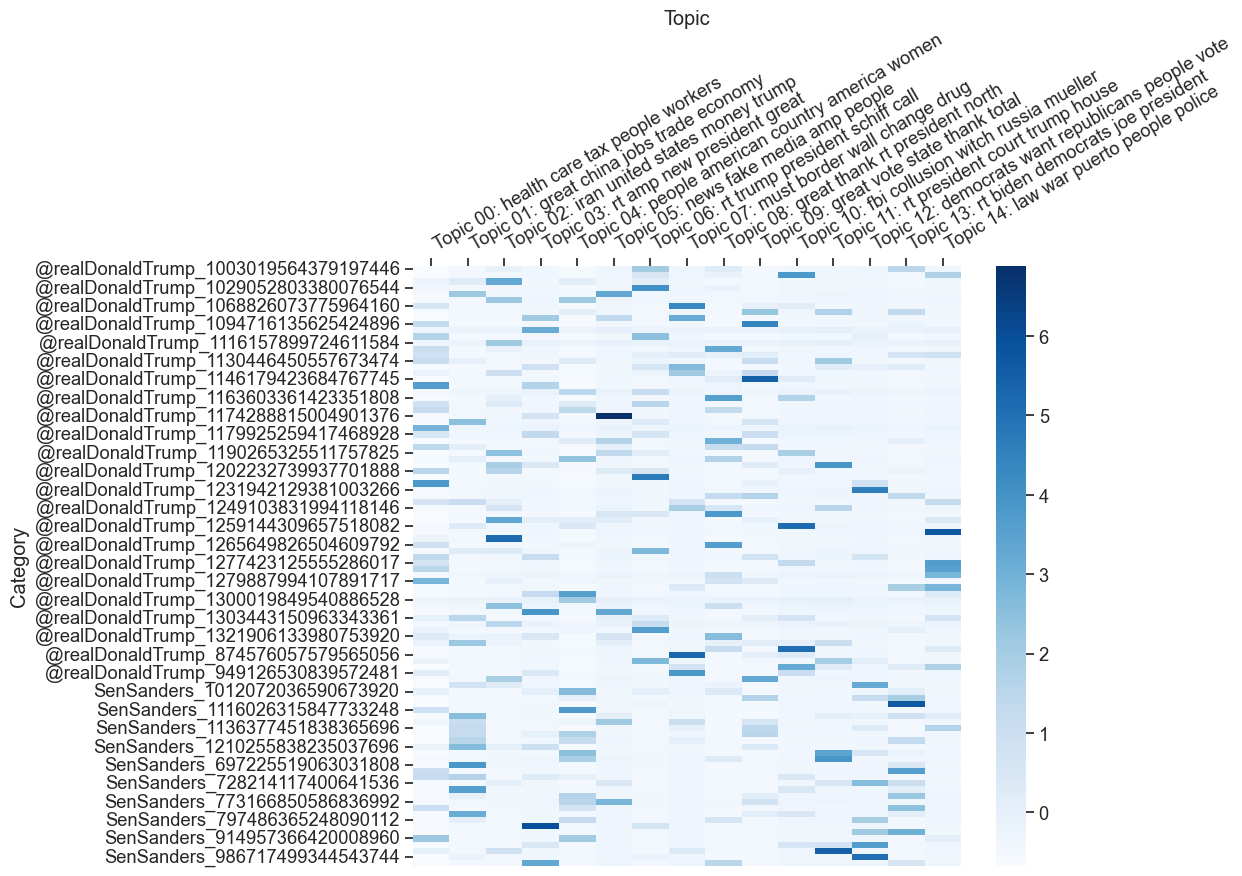

In [25]:
# Plot the heatmap
plot_categories_by_topics_heatmap(titles,
                                  topic_distributions,
                                  topic_individual_words,
                                  target_labels=target_labels,
                                  color_map = 'Blues',
                                 dim=(12,9))

## Q9. Interpret the heatmap
Do you see any pattern in the probability distributions of topics for each politician?

Are there topics that are more likely for one of the two politicians?

### Q9 (words)
The darker the color blue, the higher probability for the corresponding topic.

1. From this heatmap, we can see that Topic 2, Topic 5, Topic 9, Topic 10 and Topic 14 have darker spaces related with Trump than Sanders. While Topic 1, Topic 3, Topic 11, and Topic 13 have darker spaces related with Sanders than Trump.

   This pattern shows a difference between these two politician's focus on topics. For example, bases on the findings, Trump would focus more on Iran, military, fake news, vote, collusion matters. However, Sanders seems to focus more on the president matter, such as voting for a president.


2. There are topics are more likely for one of the two politicians. Compared to Sanders, Topic 5 which is about fake news has the darkest space related with Trump. Topic 10 which is about collusion has more dark spaces related with Trump as well. However, the spaces under these topics related with Sanders are very light.

   For Sanders, compared to Trump, Topic 3 which is about a new president has the darkest space related with Sanders.

### X2. Optional question 2
(This question is not compulsory, it only allows you to get an extra point)

Make the sample balanced, with 50 tweets by Trump and 50 by Sanders.

In [26]:
df = pd.read_csv('C:/users/idaid/Desktop/sanders_trump_tweets.csv')

In [27]:
# Get the values
column_data = df['Title']
print(column_data)

0              SenSanders_1351670845639421952
1              SenSanders_1351259762722279424
2              SenSanders_1351242822293319680
3              SenSanders_1350885541911400448
4              SenSanders_1349880150041780224
                         ...                 
30366    @realDonaldTrump_1346912780700577792
30367    @realDonaldTrump_1346928882595885058
30368    @realDonaldTrump_1347334804052844550
30369    @realDonaldTrump_1347555316863553542
30370    @realDonaldTrump_1347569870578266115
Name: Title, Length: 30371, dtype: object


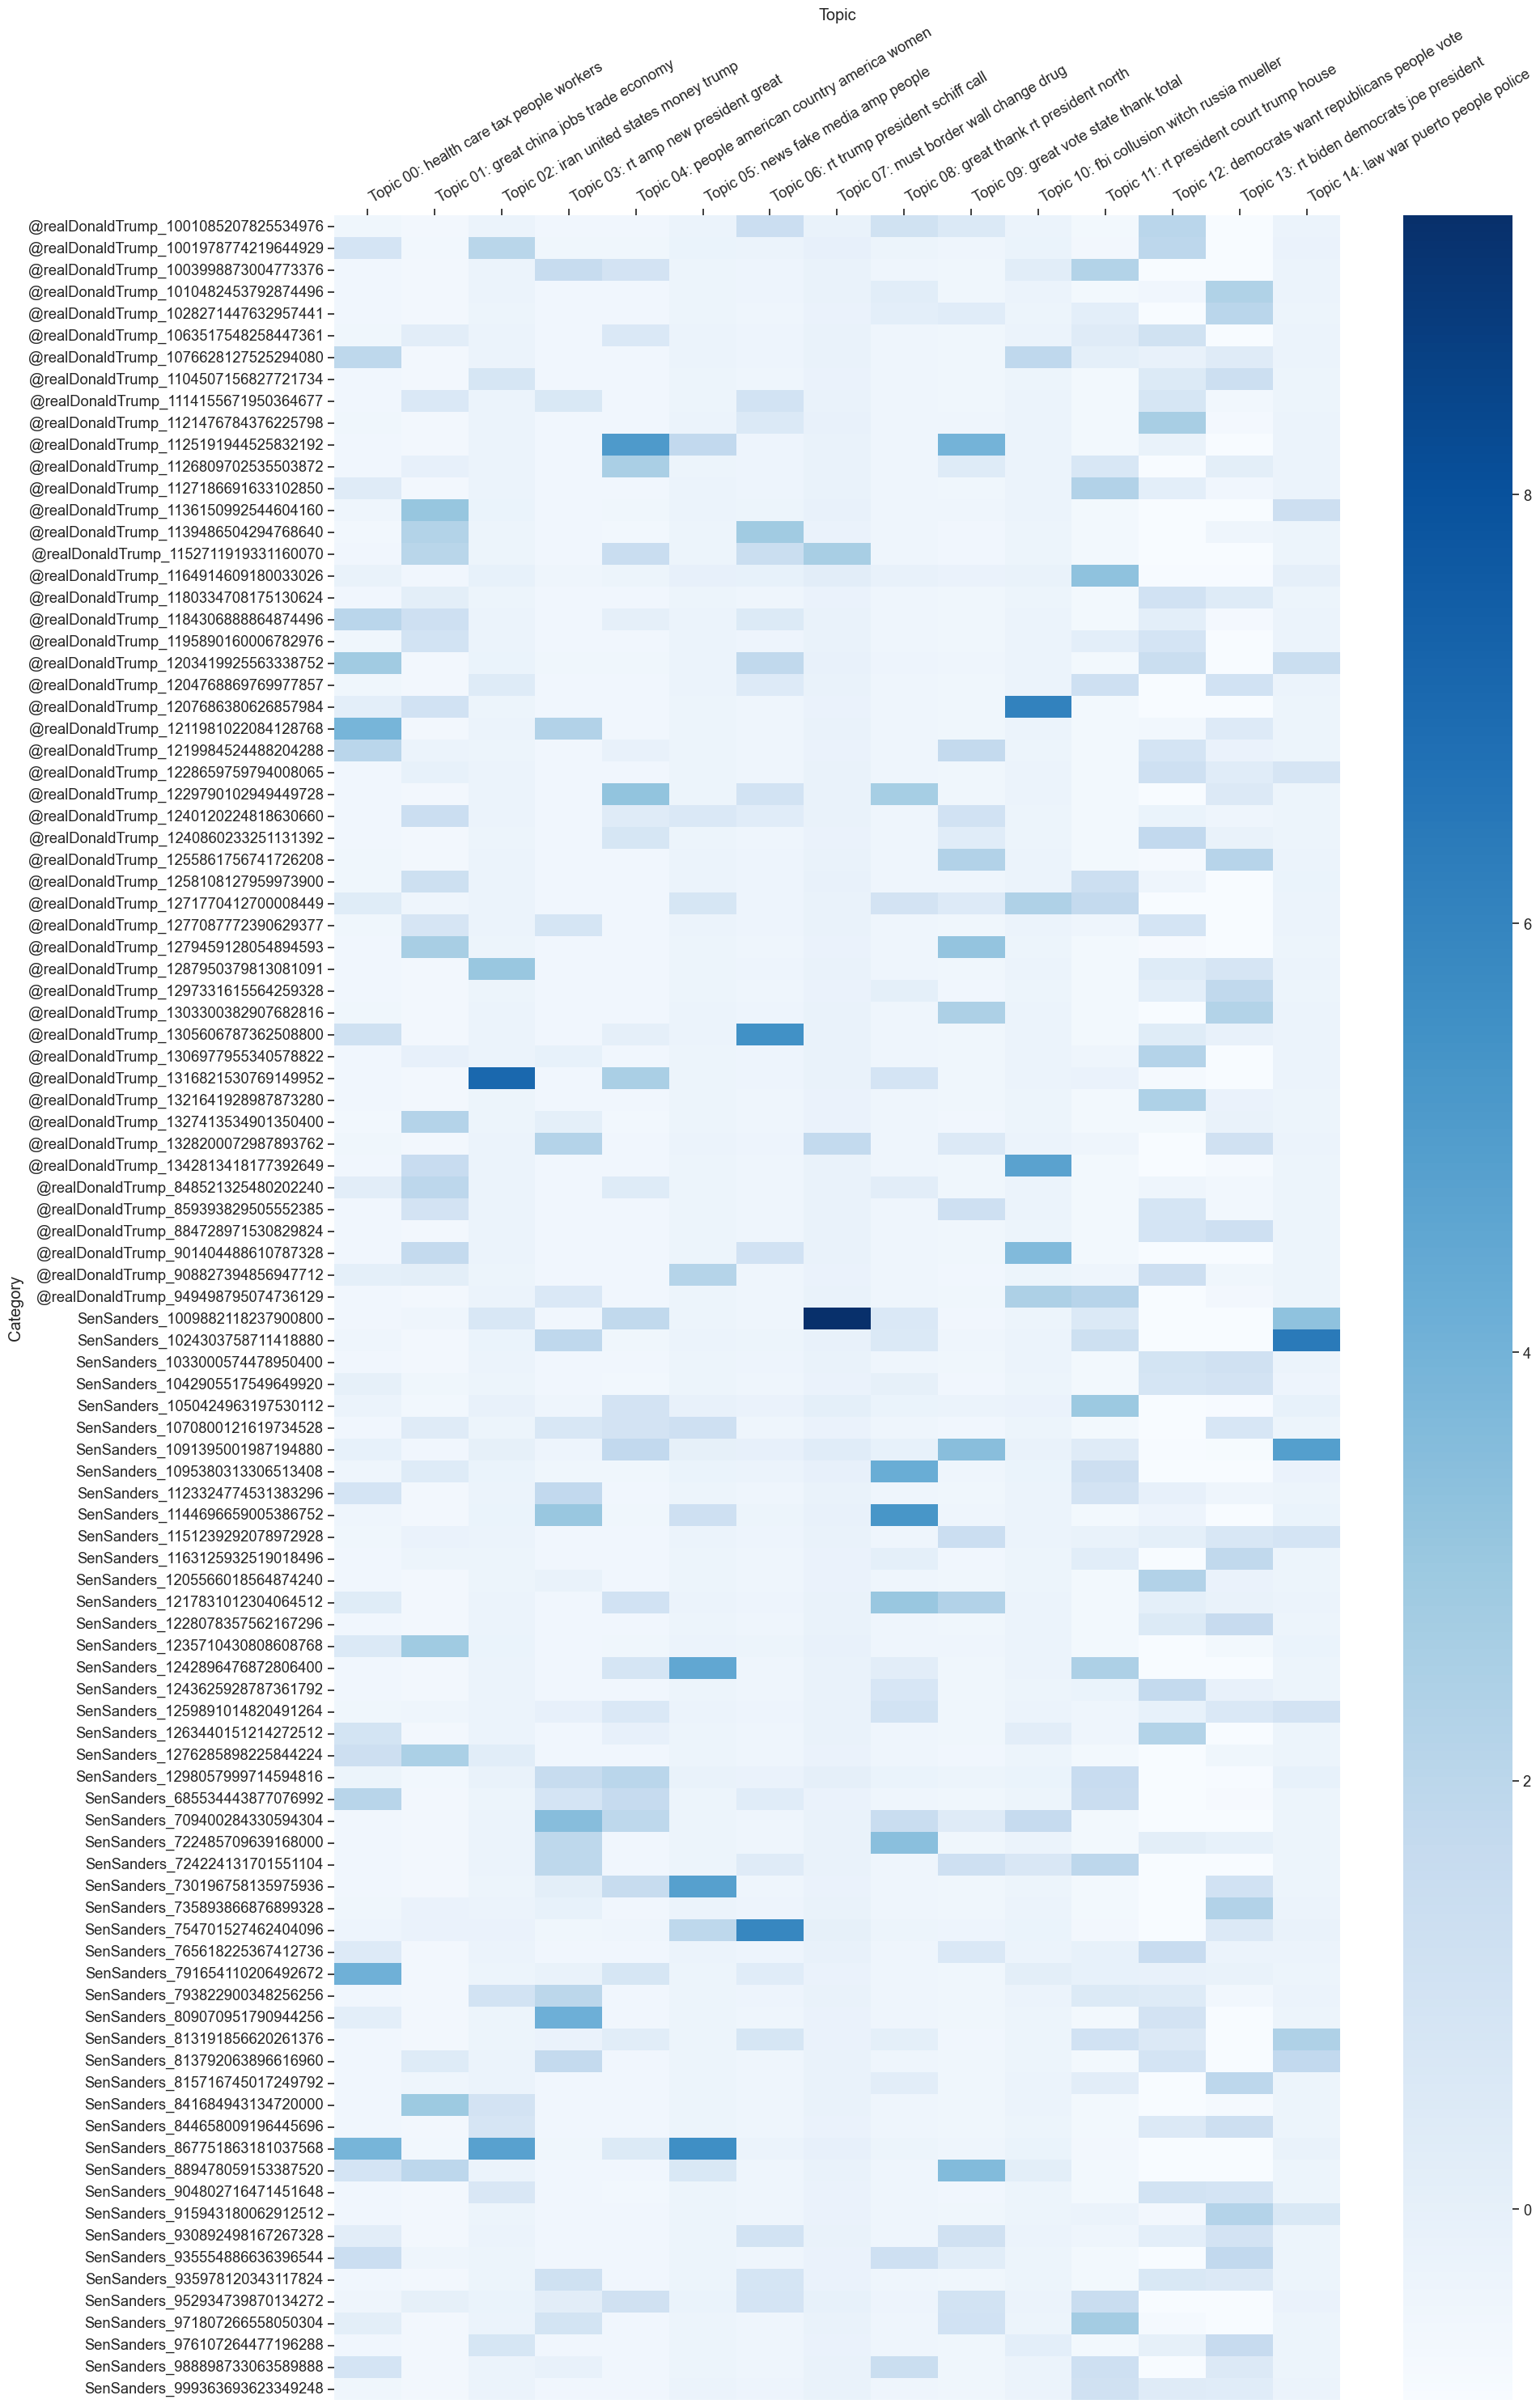

In [28]:
# X2 (code)
sanders_tweets_titles = [title for title in titles if 'SenSanders' in title]
trump_tweets_titles = [title for title in titles if '@realDonaldTrump'in title]

# Make sample size to 50
sample_size = 50

# Sample the titles
sample_sanders = sample(sanders_tweets_titles, 50)
sample_trump = sample(trump_tweets_titles, 50)

# Combine samples into a balanced sample
balanced_sample = sample_sanders + sample_trump

#Plot the heatmap
plot_categories_by_topics_heatmap(balanced_sample,
                                  topic_distributions,
                                  topic_individual_words,
                                  target_labels=balanced_sample,
                                  color_map = 'Blues',
                                 dim=(20,30))

### X3. Optional question 3
(This question is not compulsory, it only allows you to get an extra point)

Extend the analysis to all the tweets in the dataset.

In [ ]:
# X3 (code and words)
# Tip: plotting a heatmap for thousands of tweets is not practical.
# Make a comparison based on the numerical values in the `df_norm_col` dataframe (see Week 6 notebook)